# Independent Component Analysis (ICA)
This notebook explores the utiliy of ICA and how it differs from PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA, PCA
from sklearn.datasets import load_sample_images
import seaborn as sns
sns.set()

Let's start with a simplified [cocktail party](https://en.wikipedia.org/wiki/Signal_separation) problem. We will first generate sine waves of differing frequencies amd amplitudes. Then we will mix them together.

Text(0.5, 1.0, 'Mixed Observations (Linear Sum)')

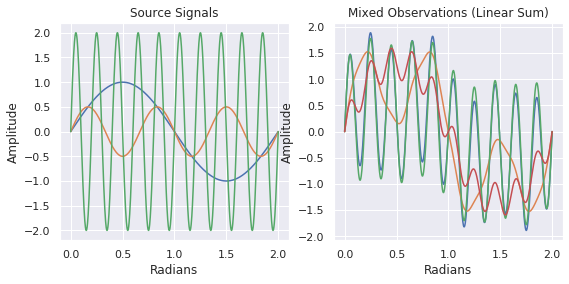

In [2]:
freqs = 1, 3, 10
amplitudes = 1, 0.5, 2
start, stop, n_samples = 0, 2*np.pi, 1000

sample_points = np.linspace(start, stop, n_samples)
sine_waves = np.array([np.sin(sample_points * f) * a for f, a in zip(freqs, amplitudes)]).T
A = np.array([[1, 1, 1], 
              [3, 5, 0.1], 
              [1.5, 1.0, 2.0],
              [8, 1, 0.9]])  # Mixing matrix
mixed = np.dot(sine_waves, A.T)  # Generate observations

plt.figure(figsize=(9,4), tight_layout=True)
plt.subplot(1,2,1)
plt.plot(sample_points / np.pi, sine_waves)
plt.xlabel('Radians'), plt.ylabel('Amplitude')
plt.title('Source Signals')

plt.subplot(1,2,2)
plt.plot(sample_points / np.pi, mixed)
plt.xlabel('Radians'), plt.ylabel('Amplitude')
plt.title('Mixed Observations (Linear Sum)')

Now we will apply ICA to our mixed signal, and compare the recovered and original sources.

Text(0.5, 1.0, 'Original Sources')

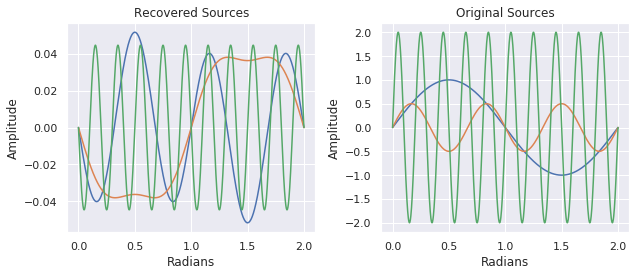

In [7]:
transformer = FastICA(n_components=3, random_state=0)
mixed_transformed = transformer.fit_transform(mixed)

plt.figure(figsize=(9,4), tight_layout=True)
plt.subplot(1,2,1)
plt.plot(sample_points / np.pi, mixed_transformed)
plt.xlabel('Radians'), plt.ylabel('Amplitude')
plt.title('Recovered Sources')

plt.subplot(1,2,2)
plt.plot(sample_points / np.pi, sine_waves)
plt.xlabel('Radians'), plt.ylabel('Amplitude')
plt.title('Original Sources')